In [19]:
import pandas as pd
data = pd.read_csv('data.csv')

In [20]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [21]:
data.isna().sum()

ConvertedCompYearly         0
Age                         8
YearsCode                  11
YearsCodePro               20
Country                     0
EdLevel                     0
DevType                     4
Employment                  0
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
PlatformHaveWorkedWith      0
WebframeHaveWorkedWith      0
ToolsTechHaveWorkedWith     0
dtype: int64

In [22]:
data['YearsCodePro'] = data['YearsCodePro'].str.extract(r'(\d+)') 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')  
max(data['YearsCodePro'])

50.0

In [23]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

In [24]:
data[data['YearsCode'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
114,48000.0,25-34 years old,NaN,NaN,Germany,"Associate degree (A.A., A.S., etc.)","Developer, full-stack",Employed full-time,"['C#', 'HTML/CSS', 'JavaScript', 'Node.js', 'P...",['MariaDB'],[],"['Angular', 'ASP.NET Core ']",['Git']
181,95520.0,35-44 years old,NaN,NaN,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, desktop or enterprise applications;...",Employed full-time,"['COBOL', 'Java', 'JavaScript', 'PHP', 'Python...","['IBM DB2', 'MySQL', 'SQLite']",[],"['Angular', 'Flask', 'Spring']","['Docker', 'Git']"
620,77832.0,35-44 years old,NaN,NaN,Italy,"Secondary school (e.g. American high school, G...","Developer, full-stack;Developer, game or graph...",Employed full-time,"['Assembly', 'C', 'C++', 'Delphi', 'Node.js', ...","['Elasticsearch', 'Microsoft SQL Server', 'SQL...",[],[],[]
893,19572.0,18-24 years old,NaN,NaN,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,['Java'],"['MySQL', 'PostgreSQL']",['AWS'],[],['Git']
988,225001.0,18-24 years old,NaN,NaN,United States of America,"Professional degree (JD, MD, etc.)","Developer, mobile;Engineer, data;Other (please...",Employed full-time,"['Assembly', 'C', 'C++', 'JavaScript']",[],[],[],[]
1432,99708.0,25-34 years old,NaN,5.0,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell', 'Clojure', 'SQL']","['Elasticsearch', 'PostgreSQL', 'Firebase Real...","['AWS', 'Firebase']",[],['Docker']
1434,5256.0,18-24 years old,NaN,NaN,Bangladesh,"Associate degree (A.A., A.S., etc.)","Developer, back-end","Employed, full-time","['Go', 'JavaScript', 'Rust']","['MySQL', 'PostgreSQL']",['AWS'],"['Express', 'Node.js', 'React.js']","['Docker', 'npm']"
2870,12000.0,35-44 years old,NaN,20.0,Pakistan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Blockchain,"Employed, full-time","['Python', 'Rust', 'SQL']",['Oracle'],[],[],"['Cargo', 'Pip', 'Yarn']"
3265,41697.0,25-34 years old,NaN,9.0,Czech Republic,"Secondary school (e.g. American high school, G...","Developer, front-end","Independent contractor, freelancer, or self-em...","['HTML/CSS', 'TypeScript']",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Deno', 'Node.js', 'React']","['npm', 'Vite']"
3301,12342.0,18-24 years old,NaN,1.0,Ukraine,Some college/university study without earning ...,Student,"Student, full-time;Employed, part-time","['Assembly', 'Bash/Shell (all shells)', 'C', '...","['Cloud Firestore', 'Firebase Realtime Databas...","['Amazon Web Services (AWS)', 'Firebase', 'Net...","['FastAPI', 'Flask', 'Next.js', 'Node.js', 'Re...","['APT', 'Bun', 'Docker', 'Make', 'npm', 'Pip',..."


Giả định YearsCode 

In [25]:
# Tính giá trị trung bình của 'YearsCodePro' cho từng nhóm 'YearsCode'
mean_years_code_pro = data.groupby('YearsCode')['YearsCodePro'].transform(lambda x: x.mean())

# Gán giá trị trung bình cho các hàng có 'YearsCodePro' là NaN và 'YearsCode' không phải NaN
data.loc[data['YearsCodePro'].isna() & data['YearsCode'].notna(), 'YearsCodePro'] = data.loc[
    data['YearsCodePro'].isna() & data['YearsCode'].notna(), 'YearsCode'].map(
    mean_years_code_pro
)

# Kiểm tra kết quả
print(data['YearsCodePro'].isna().sum())  # Kiểm tra số lượng NaN trong 'YearsCodePro'


7


In [26]:
data = data.dropna(subset=['YearsCode'])

In [27]:
mean_years_code = data.groupby('YearsCodePro')['YearsCode'].transform(lambda x: x.mean())

# Gán giá trị trung bình của 'YearsCode' vào các hàng có 'YearsCode' là NaN và 'YearsCodePro' không phải NaN
data.loc[data['YearsCode'].isna() & data['YearsCodePro'].notna(), 'YearsCode'] = data.loc[
    data['YearsCode'].isna() & data['YearsCodePro'].notna(), 'YearsCodePro'].map(
    data.groupby('YearsCodePro')['YearsCode'].mean()
)


In [28]:
len(data[data['YearsCodePro'].isna()])

0

In [29]:
len(data[data['Age'].isna()])

8

In [30]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2+0.5
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [31]:
# average_age_by_years_code = data.groupby('YearsCode')['Age'].transform(lambda x: x.mean())

# # Chỉ thay thế các giá trị NaN trong cột Age
# data.loc[data['Age'].isna(), 'Age'] = data.loc[data['Age'].isna(), 'YearsCode'].map(
#     data.groupby('YearsCode')['Age'].mean()
# )


In [32]:
len(data[data['Age'].isna()])

35

In [33]:
data= data.dropna(subset = ['Age'])

In [34]:
# Shuffle các hàng trong DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
len(data[data['YearsCodePro'].isna()])


0

In [37]:
data = data.dropna(subset=['YearsCodePro'])

In [38]:
data[data['EdLevel'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [39]:
data[data['Country'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [40]:
data[data['Employment'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [41]:
data.dtypes

ConvertedCompYearly        float64
Age                        float64
YearsCode                  float64
YearsCodePro               float64
Country                     object
EdLevel                     object
DevType                     object
Employment                  object
LanguageHaveWorkedWith      object
DatabaseHaveWorkedWith      object
PlatformHaveWorkedWith      object
WebframeHaveWorkedWith      object
ToolsTechHaveWorkedWith     object
dtype: object

In [42]:
data = data.dropna() #về sau sửa đoạn này

Vẽ biểu đồ và phân tích

In [43]:
data

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
0,51555.0,50.0,39.0,28.0,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, part-time","['C#', 'PHP', 'SQL', 'Visual Basic (.Net)']","['Firebird', 'Microsoft SQL Server', 'SQLite']",['Microsoft Azure'],"['ASP.NET', 'jQuery']",['NuGet']
1,110570.0,40.0,10.0,6.0,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Project manager,"Employed, full-time;Independent contractor, fr...","['Bash/Shell (all shells)', 'PowerShell', 'Pyt...",[],['Amazon Web Services (AWS)'],[],['Chocolatey']
2,44978.0,30.0,10.0,6.0,Greece,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end","Employed, full-time","['Go', 'Python', 'SQL']",['PostgreSQL'],['Microsoft Azure'],['Django'],"[""LLVM's Clang"", 'Make']"
3,8292.0,30.0,15.0,8.0,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, embedded applications or devices",Employed full-time,"['Assembly', 'C', 'C#', 'C++', 'HTML/CSS', 'Ja...","['Microsoft SQL Server', 'MySQL', 'Oracle', 'P...",['AWS'],"['jQuery', 'React.js', 'Spring']","['Git', 'Unity 3D', 'Xamarin', 'Yarn']"
4,82000.0,40.0,25.0,18.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","['Bash/Shell (all shells)', 'HTML/CSS', 'Java'...","['MySQL', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Digital Ocean',...","['Drupal', 'Node.js', 'Svelte', 'Vue.js', 'Wor...","['Composer', 'Docker', 'Homebrew', 'npm', 'Vit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,68832.0,30.0,11.0,1.0,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","['JavaScript', 'TypeScript']",['Cloud Firestore'],"['Firebase', 'Google Cloud']",['Angular'],"['Homebrew', 'npm']"
3950,127000.0,50.0,40.0,22.0,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end;Developer, back-end;Devel...","Employed, full-time","['C', 'C++', 'JavaScript', 'SQL']","['MariaDB', 'SQLite']",[],[],['Homebrew']
3951,13176.0,21.5,3.0,1.0,Indonesia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",Employed full-time,"['HTML/CSS', 'JavaScript', 'Node.js', 'TypeScr...",[],"['AWS', 'Heroku']","['Django', 'Express', 'React.js', 'Vue.js']","['Docker', 'Git']"
3952,97143.0,40.0,24.0,22.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell (all shells)', 'C#', 'HTML/CSS', ...","['Dynamodb', 'Microsoft SQL Server', 'PostgreS...",['Amazon Web Services (AWS)'],"['Angular', 'ASP.NET', 'ASP.NET CORE', 'jQuery']","['Docker', 'Kubernetes', 'MSBuild', 'npm', 'Nu..."


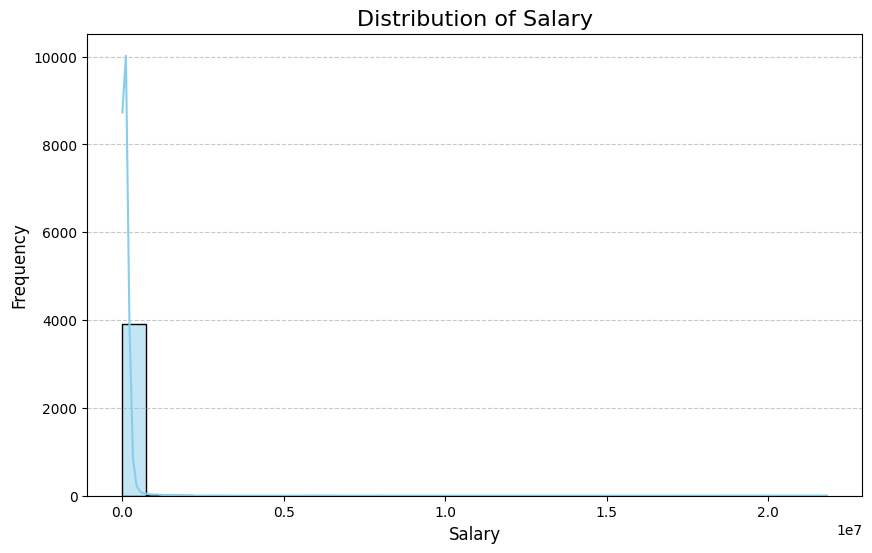

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [46]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


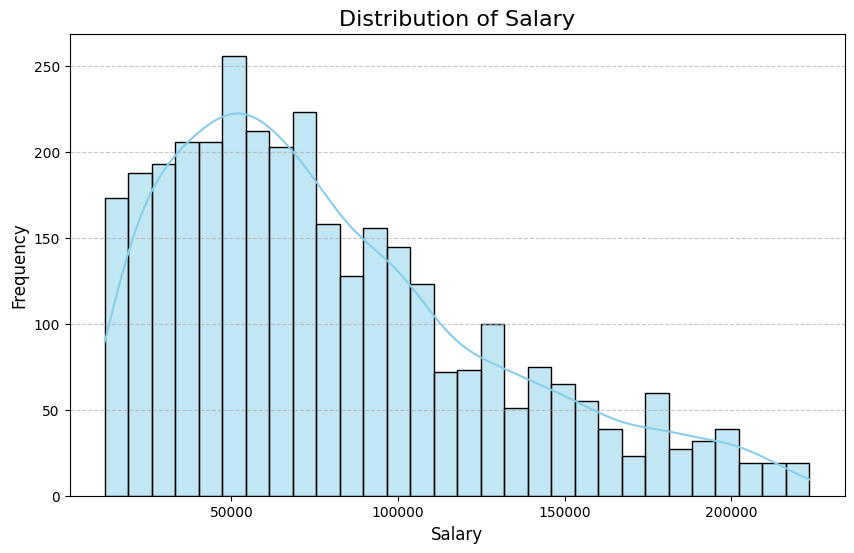

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\780036900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


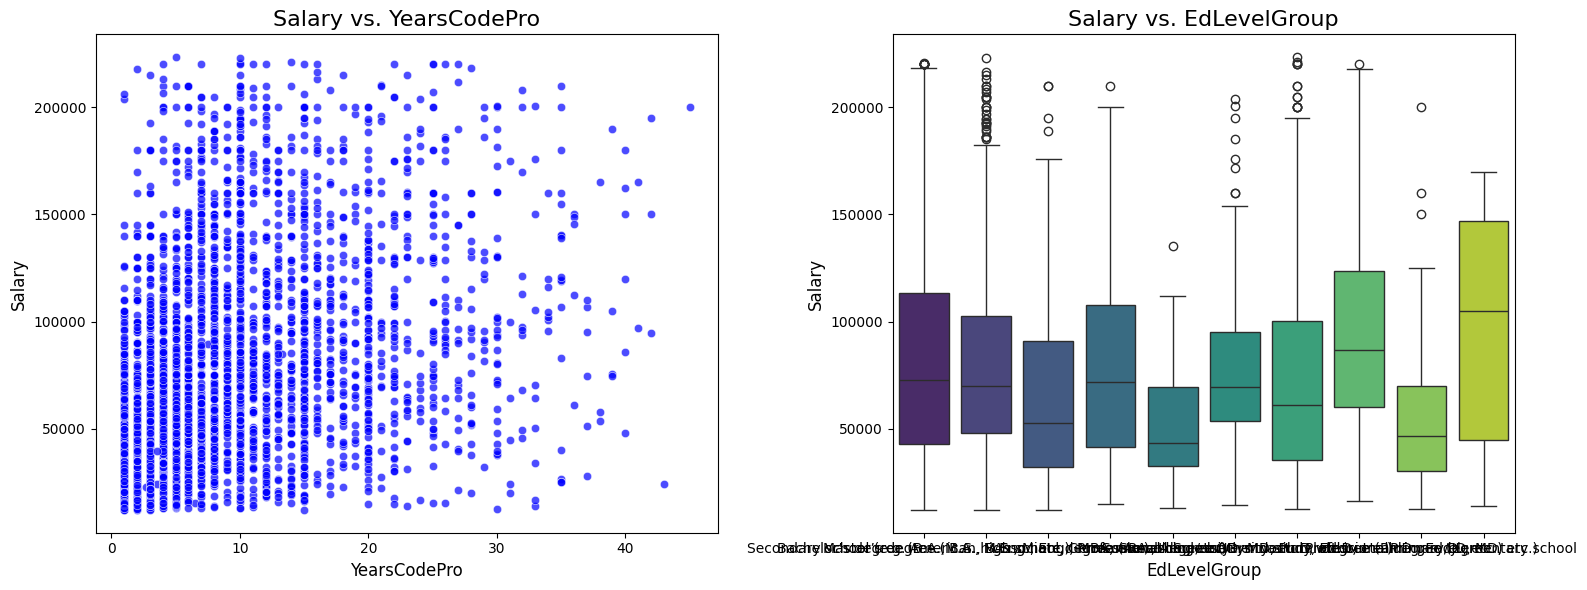

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [49]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [50]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 674


In [51]:
data['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [52]:
edlevel_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    'Something else': 'Other',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'Primary/elementary school': 'Primary school'
}

# Thay thế các giá trị trong cột EdLevel bằng nhóm tương ứng
data['EdLevel'] = data['EdLevel'].map(edlevel_map)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\2055916472.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


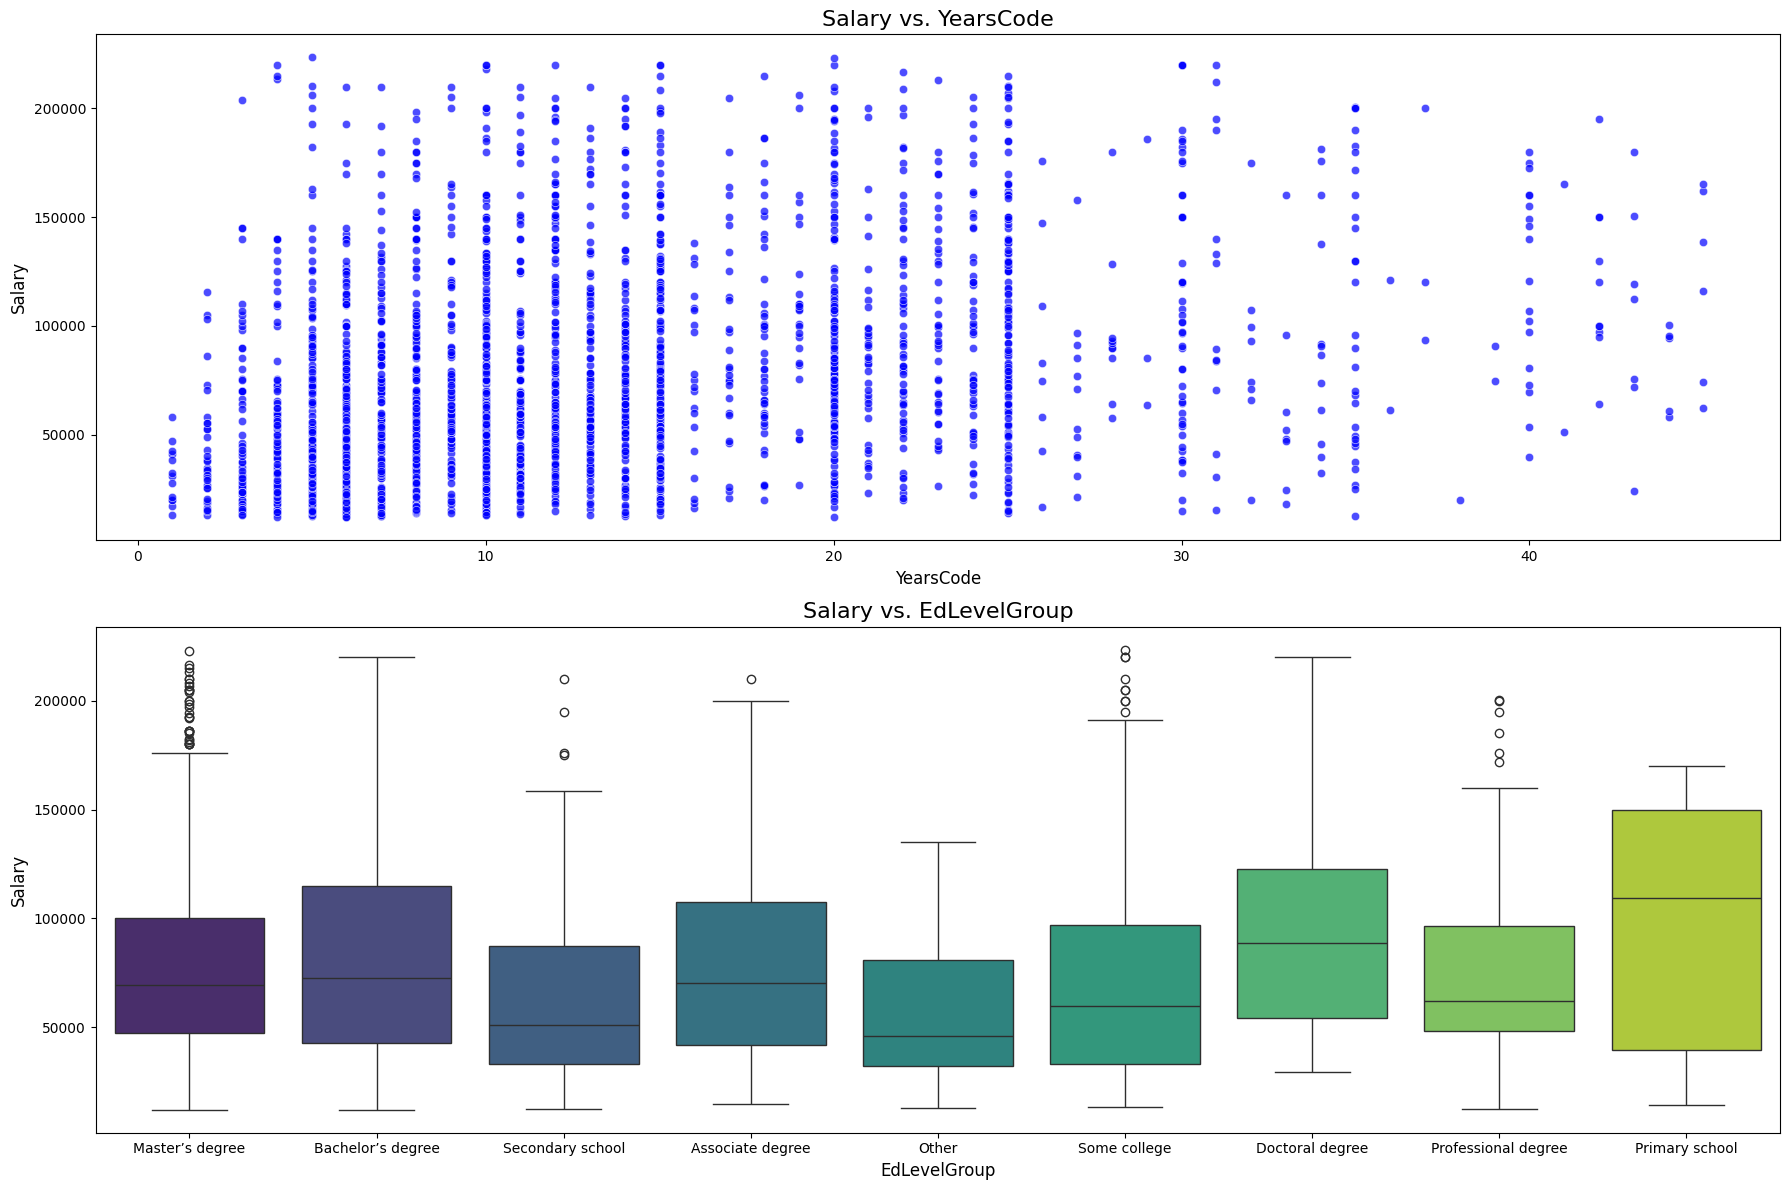

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Chỉnh số lượng hàng và cột
sns.scatterplot(x=data['YearsCode'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCode', fontsize=16)
axes[0].set_xlabel('YearsCode', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)

sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


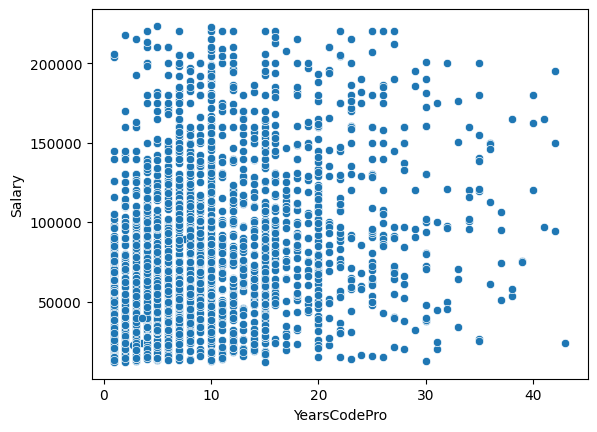

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='YearsCodePro', y='Salary', data=data)
plt.show()


In [55]:
data['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Secondary school',
       'Associate degree', 'Other', 'Some college', 'Doctoral degree',
       'Professional degree', 'Primary school'], dtype=object)

Nhớ sửa phần này

In [56]:
primary_school_salary = data[data['EdLevel'] == 'Primary school']

# Xóa tất cả các giá trị lương lớn hơn 10,000 trong nhóm này
data = data[~((data['EdLevel'] == 'Primary school'))] 


C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\1621175164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')


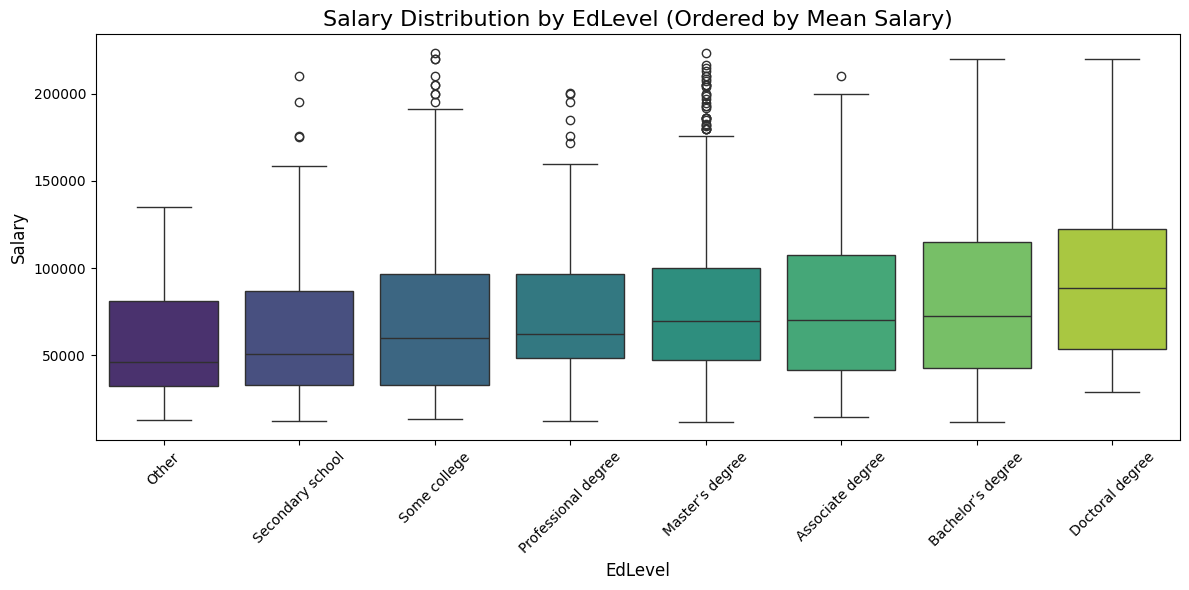

In [57]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].mean().sort_values()

# Vẽ biểu đồ boxplot với thứ tự các nhóm đã sắp xếp
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')
plt.title('Salary Distribution by EdLevel (Ordered by Mean Salary)', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
data['EdLevel'].value_counts()


EdLevel
Bachelor’s degree      1242
Master’s degree         744
Some college            300
Secondary school        114
Associate degree        102
Professional degree      85
Doctoral degree          38
Other                    27
Name: count, dtype: int64

In [59]:
# data[data['EdLevel'] == 'Primary school']['Salary']

In [60]:
# Kiểm tra các giá trị lương trong nhóm "Primary school"
# primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
# primary_school_salary.describe()


In [61]:
data['DevType'] = data['DevType'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['DevType'] = data['DevType'].str.split(";")

In [62]:
data['DevType']

1            [Project manager]
2         [Developer back-end]
4        [Developer front-end]
5       [Developer full-stack]
6       [Developer full-stack]
                 ...          
3947    [Developer full-stack]
3949     [Developer front-end]
3951     [Developer front-end]
3952      [Developer back-end]
3953       [DevOps specialist]
Name: DevType, Length: 2652, dtype: object

In [63]:
data['Employment']

1       Employed, full-time;Independent contractor, fr...
2                                     Employed, full-time
4                                     Employed, full-time
5                                     Employed, full-time
6                                     Employed, full-time
                              ...                        
3947                                  Employed, full-time
3949                                  Employed, full-time
3951                                   Employed full-time
3952                                  Employed, full-time
3953                                  Employed, full-time
Name: Employment, Length: 2652, dtype: object

In [64]:
data['Employment'] = data['Employment'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['Employment'] = data['Employment'].str.split(";")

In [65]:
data['Employment']

1       [Employed full-time, Independent contractor fr...
2                                    [Employed full-time]
4                                    [Employed full-time]
5                                    [Employed full-time]
6                                    [Employed full-time]
                              ...                        
3947                                 [Employed full-time]
3949                                 [Employed full-time]
3951                                 [Employed full-time]
3952                                 [Employed full-time]
3953                                 [Employed full-time]
Name: Employment, Length: 2652, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\3121201441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")


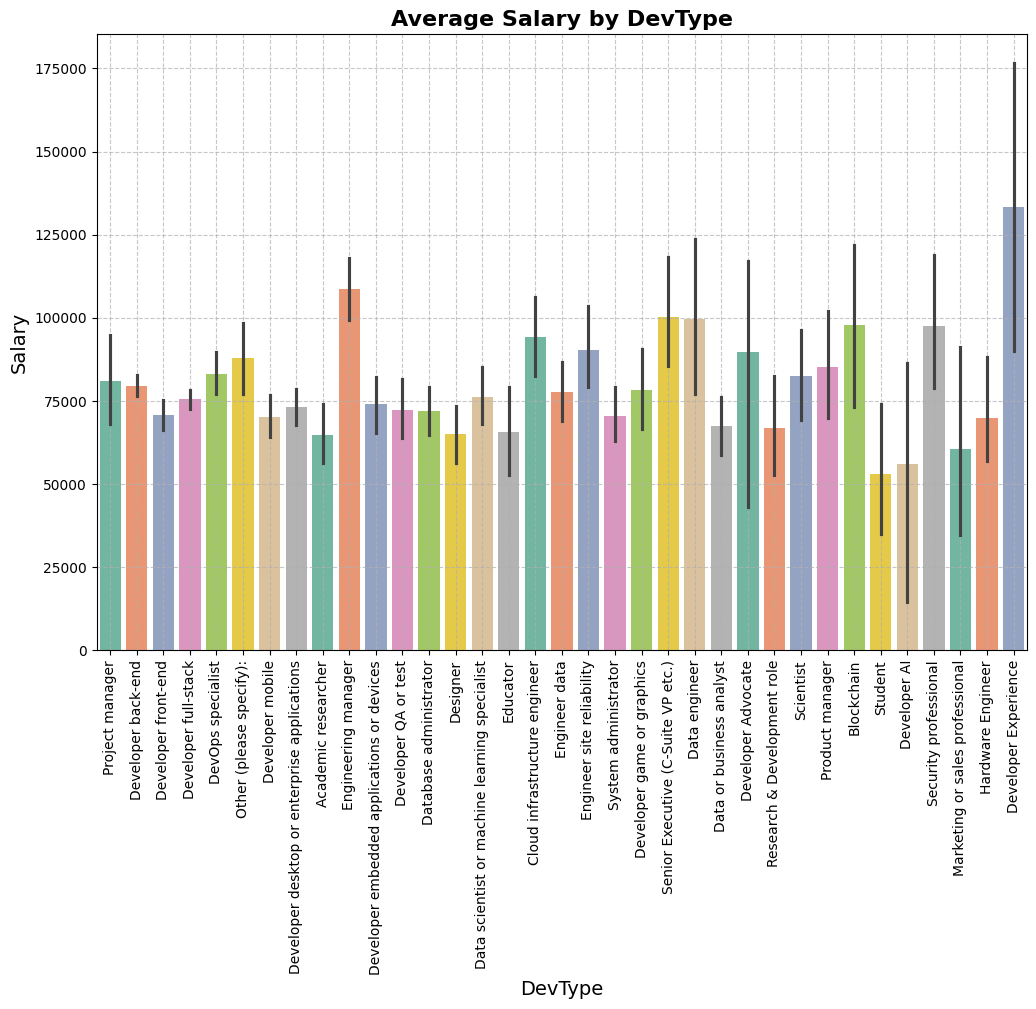

In [66]:
devtype_expanded = data.explode('DevType')
expanded_data = data.explode('DevType')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by DevType', fontsize=16, weight='bold')
plt.xlabel('DevType', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

In [67]:
data['DevType'].explode().unique()

array(['Project manager', 'Developer back-end', 'Developer front-end',
       'Developer full-stack', 'DevOps specialist',
       'Other (please specify):', 'Developer mobile',
       'Developer desktop or enterprise applications',
       'Academic researcher', 'Engineering manager',
       'Developer embedded applications or devices',
       'Developer QA or test', 'Database administrator', 'Designer',
       'Data scientist or machine learning specialist', 'Educator',
       'Cloud infrastructure engineer', 'Engineer data',
       'Engineer site reliability', 'System administrator',
       'Developer game or graphics', 'Senior Executive (C-Suite VP etc.)',
       'Data engineer', 'Data or business analyst', 'Developer Advocate',
       'Research & Development role', 'Scientist', 'Product manager',
       'Blockchain', 'Student', 'Developer AI', 'Security professional',
       'Marketing or sales professional', 'Hardware Engineer',
       'Developer Experience'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\2002881208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")


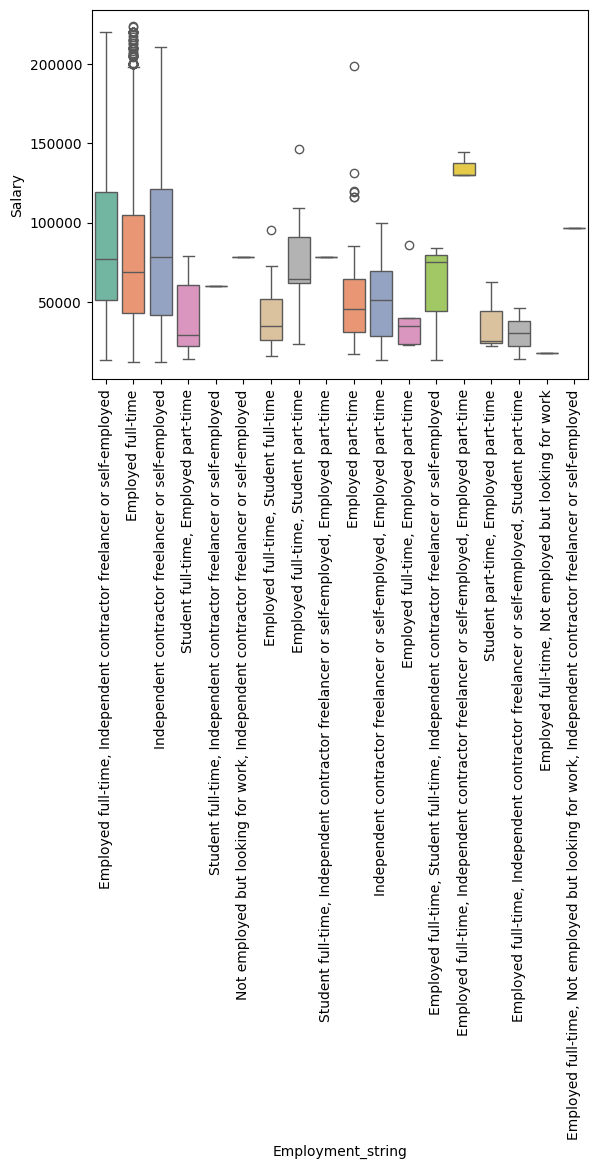

ANOVA result: F_onewayResult(statistic=3.1370689349253205, pvalue=1.4564102248858357e-05)


In [68]:
from scipy.stats import f_oneway

data['Employment_string'] = data['Employment'].apply(lambda x: ', '.join(x))
sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")
plt.xticks(rotation=90) 
plt.show()

anova_result = f_oneway(*[data['Salary'][data['Employment_string'] == group] for group in data['Employment_string'].unique()])
print('ANOVA result:', anova_result)
data = data.drop('Employment_string',axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\2829554354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


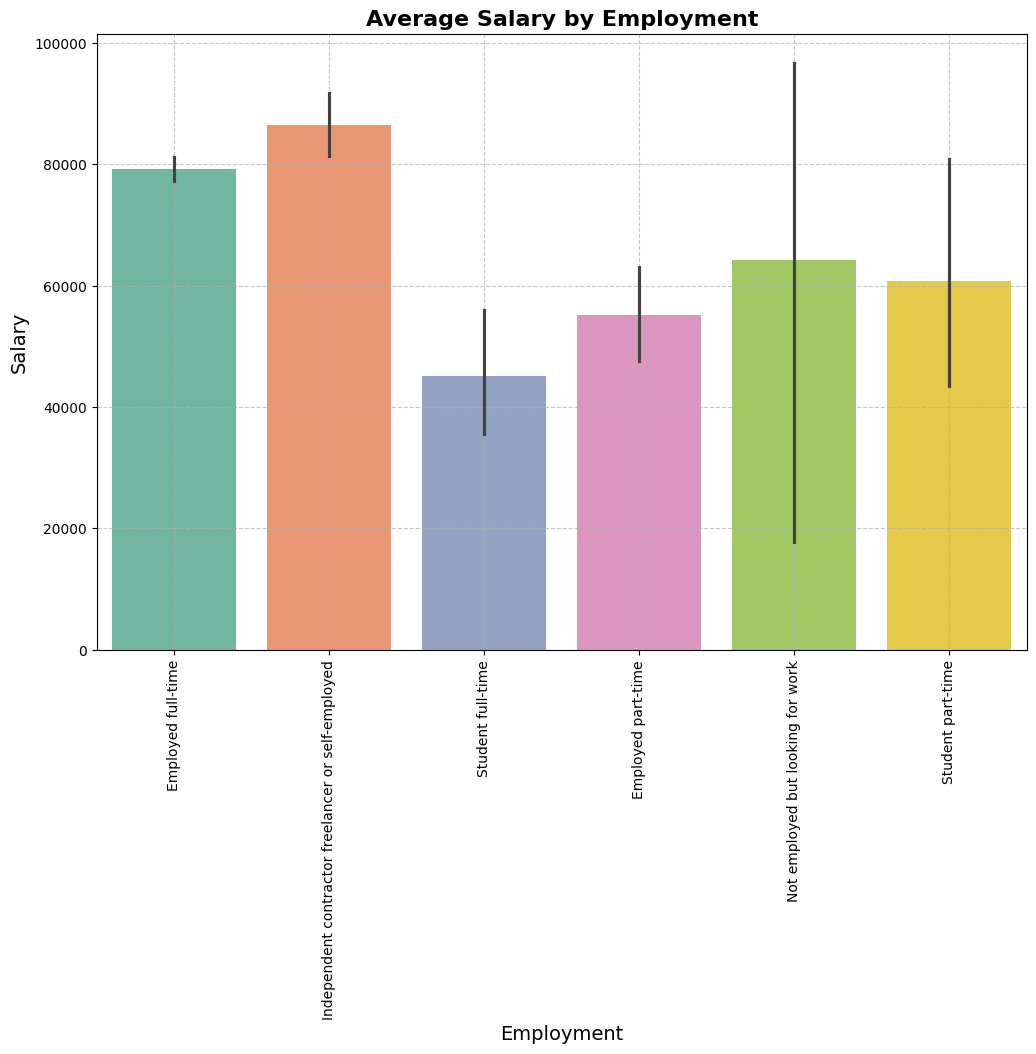

In [69]:

expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

Dữ liệu đang có vấn đề ....

In [70]:
data['Employment']

1       [Employed full-time, Independent contractor fr...
2                                    [Employed full-time]
4                                    [Employed full-time]
5                                    [Employed full-time]
6                                    [Employed full-time]
                              ...                        
3947                                 [Employed full-time]
3949                                 [Employed full-time]
3951                                 [Employed full-time]
3952                                 [Employed full-time]
3953                                 [Employed full-time]
Name: Employment, Length: 2652, dtype: object

In [71]:
data.drop(data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)].index, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\310834881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


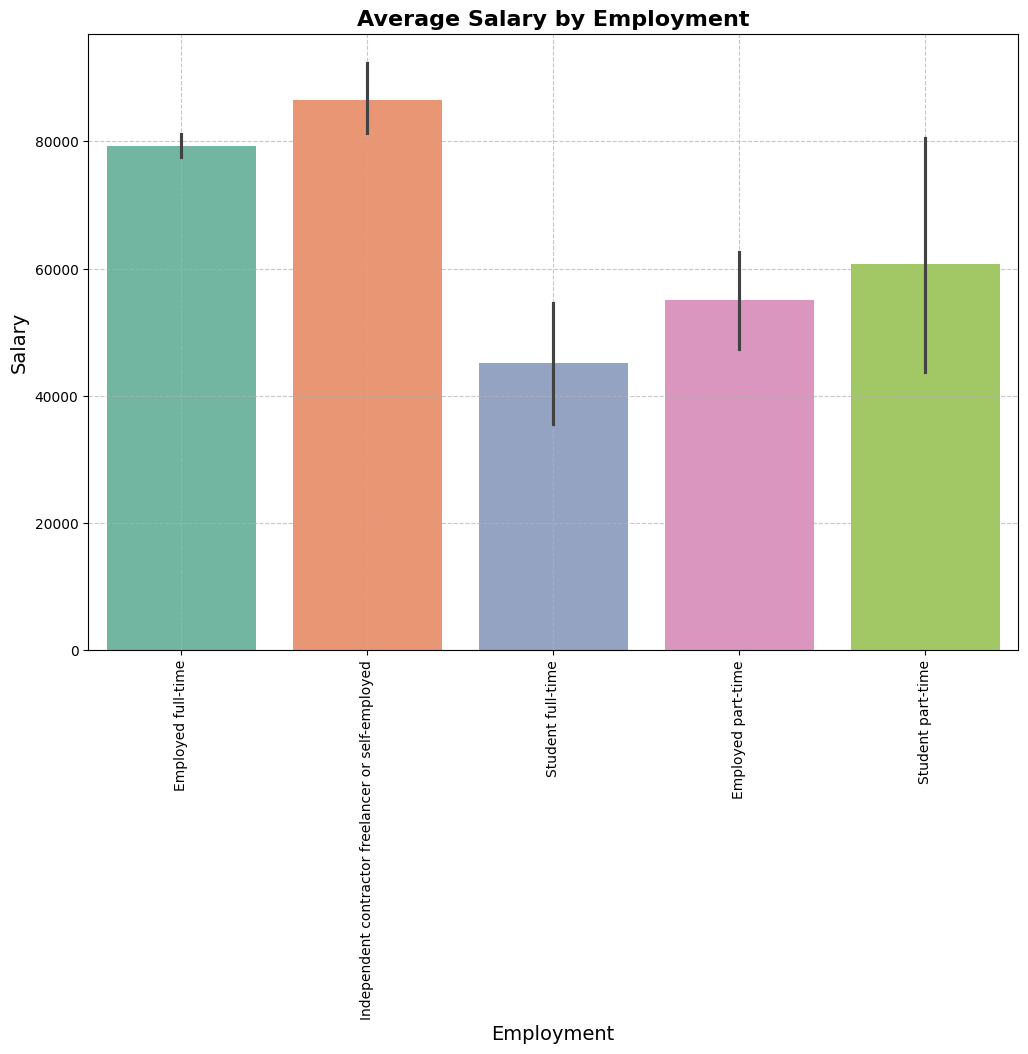

In [72]:
expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

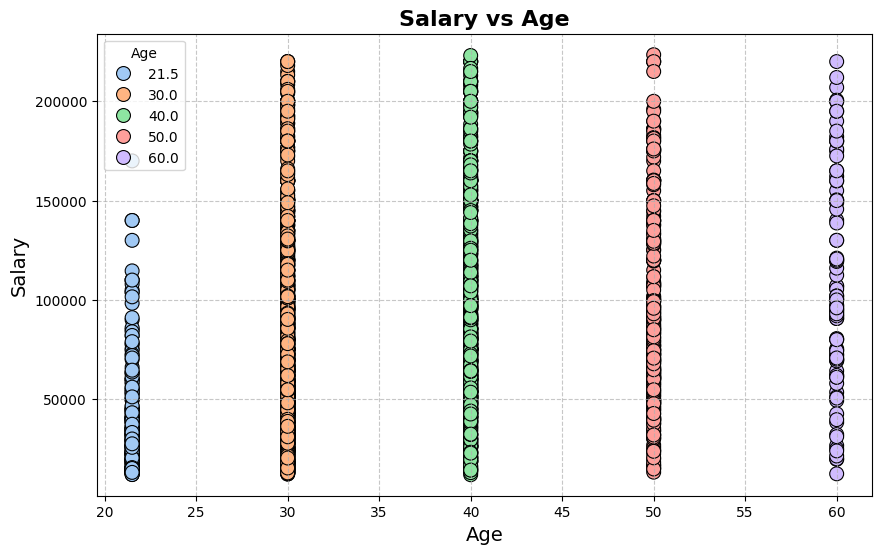

In [73]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(10, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Age', y='Salary', hue='Age', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\4198271212.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Country', y='Salary', palette='pastel', s=100, edgecolor='black')


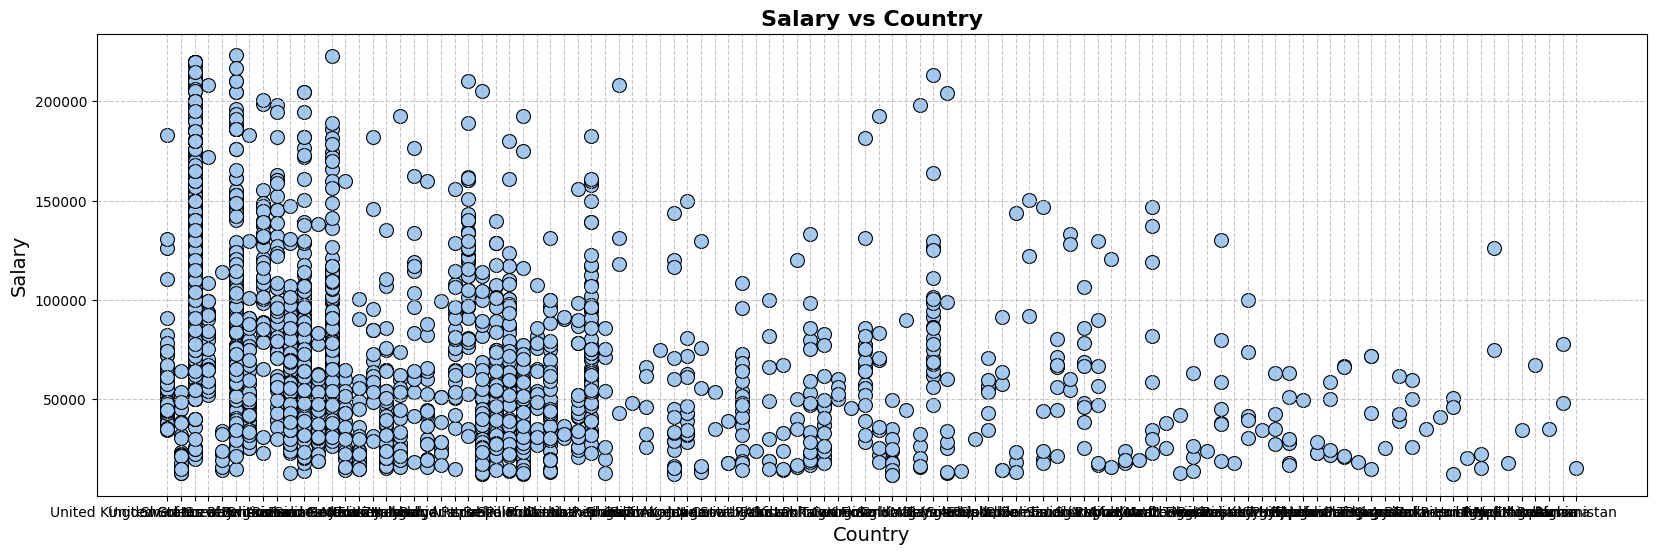

In [74]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(20, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Country', y='Salary', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [75]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills
1,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","['Bash/Shell (all shells)', 'PowerShell', 'Pyt...",[],['Amazon Web Services (AWS)'],[],['Chocolatey'],"[PowerShell, Chocolatey, Amazon Web Services (..."
2,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"['Go', 'Python', 'SQL']",['PostgreSQL'],['Microsoft Azure'],['Django'],"[""LLVM's Clang"", 'Make']","[Go, Make, PostgreSQL, Microsoft Azure, Django..."
4,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"['Bash/Shell (all shells)', 'HTML/CSS', 'Java'...","['MySQL', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Digital Ocean',...","['Drupal', 'Node.js', 'Svelte', 'Vue.js', 'Wor...","['Composer', 'Docker', 'Homebrew', 'npm', 'Vit...","[Drupal, Kotlin, Bash/Shell (all shells), Vite..."
5,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"['Java', 'SQL', 'TypeScript']","['MySQL', 'Redis']",['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Gradle', 'npm']","[Angular, TypeScript, Node.js, npm, Java, SQL,..."
6,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Type...","['Cosmos DB', 'Microsoft SQL Server', 'Oracle'...",[],"['Angular', 'ASP.NET CORE', 'React']","['Chocolatey', 'Terraform', 'Webpack']","[Angular, TypeScript, JavaScript, C#, Terrafor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['Bash/Shell (all shells)', 'C', 'C#', 'C++', ...",['Microsoft SQL Server'],"['Amazon Web Services (AWS)', 'Microsoft Azure']","['ASP.NET', 'ASP.NET CORE', 'Vue.js']","['MSBuild', 'npm', 'NuGet', 'Webpack']","[Go, Microsoft Azure, Bash/Shell (all shells),..."
3949,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"['JavaScript', 'TypeScript']",['Cloud Firestore'],"['Firebase', 'Google Cloud']",['Angular'],"['Homebrew', 'npm']","[Angular, TypeScript, JavaScript, Firebase, np..."
3951,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'Node.js', 'TypeScr...",[],"['AWS', 'Heroku']","['Django', 'Express', 'React.js', 'Vue.js']","['Docker', 'Git']","[TypeScript, Node.js, JavaScript, Django, Vue...."
3952,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell (all shells)', 'C#', 'HTML/CSS', ...","['Dynamodb', 'Microsoft SQL Server', 'PostgreS...",['Amazon Web Services (AWS)'],"['Angular', 'ASP.NET', 'ASP.NET CORE', 'jQuery']","['Docker', 'Kubernetes', 'MSBuild', 'npm', 'Nu...","[Bash/Shell (all shells), Microsoft SQL Server..."


In [76]:
# import pandas as pd

# # Giả sử df là DataFrame của bạn
# def categorize_dev_type(dev_types):
#     developer_roles = [
#         'Developer embedded applications or devices', 'Developer full-stack', 'Developer back-end', 
#         'Developer desktop or enterprise applications', 'Developer front-end', 'Developer mobile', 
#         'Developer QA or test', 'Developer game or graphics', 'Developer Experience', 'Developer AI'
#     ]
#     data_roles = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Data engineer']
#     engineer_roles = ['Cloud infrastructure engineer', 'DevOps specialist', 'Engineer site reliability', 
#                       'Engineer data', 'Hardware Engineer', 'Security professional']
#     management_roles = ['Engineering manager', 'Project manager', 'Product manager', 'Senior Executive (C-Suite VP etc.)']
#     academic_roles = ['Academic researcher', 'Scientist', 'Educator', 'Research & Development role']
#     misc_roles = ['Designer', 'Marketing or sales professional', 'Blockchain', 'Developer Advocate', 
#                   'System administrator', 'Other (please specify):']
    
#     if any(role in dev_types for role in developer_roles):
#         return 'Developer Roles'
#     elif any(role in dev_types for role in data_roles):
#         return 'Data Roles'
#     elif any(role in dev_types for role in engineer_roles):
#         return 'Engineer Roles'
#     elif any(role in dev_types for role in management_roles):
#         return 'Management and Leadership Roles'
#     elif any(role in dev_types for role in academic_roles):
#         return 'Academic and Research Roles'
#     elif any(role in dev_types for role in misc_roles):
#         return 'Miscellaneous Roles'
#     else:
#         return 'Other'

# data['DevGroup'] = data['DevType'].apply(lambda x: categorize_dev_type(x))

# data['DevGroup']

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
education_keywords = {
    "Bachelor": ["Bachelor", "Undergraduate", "BSc", "BA", "BEng"],
    "Master": ["Master", "MSc", "MA", "MEng", "MBA"],
    "PhD": ["PhD", "Doctoral", "Doctorate"],
    "Associate": ["Associate", "AAS", "AS"],
    "High School": ["High school", "Secondary school", "Highschool", "HS"],
    "Other": []
}

def classify_education_level(ed_level):
    if pd.isnull(ed_level):
        return "Other"
    
    levels_found = []
    for level, keywords in education_keywords.items():
        if any(keyword.lower() in str(ed_level).lower() for keyword in keywords):
            levels_found.append(level)
    
    if "Master" in levels_found:
        return "Master"
    elif "PhD" in levels_found:
        return "PhD"
    elif "Bachelor" in levels_found:
        return "Bachelor"
    elif "Associate" in levels_found:
        return "Associate"
    elif "High School" in levels_found:
        return "High School"
    else:
        return "Other"

data['EdLevelGroup'] = data['EdLevel'].apply(classify_education_level)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills,EdLevelGroup
1,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","['Bash/Shell (all shells)', 'PowerShell', 'Pyt...",[],['Amazon Web Services (AWS)'],[],['Chocolatey'],"[PowerShell, Chocolatey, Amazon Web Services (...",Master
2,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"['Go', 'Python', 'SQL']",['PostgreSQL'],['Microsoft Azure'],['Django'],"[""LLVM's Clang"", 'Make']","[Go, Make, PostgreSQL, Microsoft Azure, Django...",Master
4,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"['Bash/Shell (all shells)', 'HTML/CSS', 'Java'...","['MySQL', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Digital Ocean',...","['Drupal', 'Node.js', 'Svelte', 'Vue.js', 'Wor...","['Composer', 'Docker', 'Homebrew', 'npm', 'Vit...","[Drupal, Kotlin, Bash/Shell (all shells), Vite...",Bachelor
5,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"['Java', 'SQL', 'TypeScript']","['MySQL', 'Redis']",['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Gradle', 'npm']","[Angular, TypeScript, Node.js, npm, Java, SQL,...",Master
6,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Type...","['Cosmos DB', 'Microsoft SQL Server', 'Oracle'...",[],"['Angular', 'ASP.NET CORE', 'React']","['Chocolatey', 'Terraform', 'Webpack']","[Angular, TypeScript, JavaScript, C#, Terrafor...",Bachelor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['Bash/Shell (all shells)', 'C', 'C#', 'C++', ...",['Microsoft SQL Server'],"['Amazon Web Services (AWS)', 'Microsoft Azure']","['ASP.NET', 'ASP.NET CORE', 'Vue.js']","['MSBuild', 'npm', 'NuGet', 'Webpack']","[Go, Microsoft Azure, Bash/Shell (all shells),...",Bachelor
3949,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"['JavaScript', 'TypeScript']",['Cloud Firestore'],"['Firebase', 'Google Cloud']",['Angular'],"['Homebrew', 'npm']","[Angular, TypeScript, JavaScript, Firebase, np...",Bachelor
3951,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'Node.js', 'TypeScr...",[],"['AWS', 'Heroku']","['Django', 'Express', 'React.js', 'Vue.js']","['Docker', 'Git']","[TypeScript, Node.js, JavaScript, Django, Vue....",Bachelor
3952,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell (all shells)', 'C#', 'HTML/CSS', ...","['Dynamodb', 'Microsoft SQL Server', 'PostgreS...",['Amazon Web Services (AWS)'],"['Angular', 'ASP.NET', 'ASP.NET CORE', 'jQuery']","['Docker', 'Kubernetes', 'MSBuild', 'npm', 'Nu...","[Bash/Shell (all shells), Microsoft SQL Server...",Bachelor


In [78]:
education_mapping = {
    'Other': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

data['EdLevelGroup'] = data['EdLevelGroup'].map(education_mapping)

In [79]:
data = data.reset_index(drop=True)

In [80]:

# education_mapping = {
#     'Other':1,
#     'Some college':2,
#     'Secondary school':3,
#     'Professional degree':4,
#     'Master’s degree':5,
#     'Associate degree':6,
#     'Bachelor’s degree':7,
#     'Doctoral degree':8
# }

# data['EdLevel'] = data['EdLevel'].map(education_mapping)

In [81]:
data = data.reset_index(drop=True)

In [82]:
data

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills,EdLevelGroup
0,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","['Bash/Shell (all shells)', 'PowerShell', 'Pyt...",[],['Amazon Web Services (AWS)'],[],['Chocolatey'],"[PowerShell, Chocolatey, Amazon Web Services (...",3.0
1,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"['Go', 'Python', 'SQL']",['PostgreSQL'],['Microsoft Azure'],['Django'],"[""LLVM's Clang"", 'Make']","[Go, Make, PostgreSQL, Microsoft Azure, Django...",3.0
2,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"['Bash/Shell (all shells)', 'HTML/CSS', 'Java'...","['MySQL', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Digital Ocean',...","['Drupal', 'Node.js', 'Svelte', 'Vue.js', 'Wor...","['Composer', 'Docker', 'Homebrew', 'npm', 'Vit...","[Drupal, Kotlin, Bash/Shell (all shells), Vite...",2.0
3,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"['Java', 'SQL', 'TypeScript']","['MySQL', 'Redis']",['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Gradle', 'npm']","[Angular, TypeScript, Node.js, npm, Java, SQL,...",3.0
4,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Type...","['Cosmos DB', 'Microsoft SQL Server', 'Oracle'...",[],"['Angular', 'ASP.NET CORE', 'React']","['Chocolatey', 'Terraform', 'Webpack']","[Angular, TypeScript, JavaScript, C#, Terrafor...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['Bash/Shell (all shells)', 'C', 'C#', 'C++', ...",['Microsoft SQL Server'],"['Amazon Web Services (AWS)', 'Microsoft Azure']","['ASP.NET', 'ASP.NET CORE', 'Vue.js']","['MSBuild', 'npm', 'NuGet', 'Webpack']","[Go, Microsoft Azure, Bash/Shell (all shells),...",2.0
2645,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"['JavaScript', 'TypeScript']",['Cloud Firestore'],"['Firebase', 'Google Cloud']",['Angular'],"['Homebrew', 'npm']","[Angular, TypeScript, JavaScript, Firebase, np...",2.0
2646,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'Node.js', 'TypeScr...",[],"['AWS', 'Heroku']","['Django', 'Express', 'React.js', 'Vue.js']","['Docker', 'Git']","[TypeScript, Node.js, JavaScript, Django, Vue....",2.0
2647,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell (all shells)', 'C#', 'HTML/CSS', ...","['Dynamodb', 'Microsoft SQL Server', 'PostgreS...",['Amazon Web Services (AWS)'],"['Angular', 'ASP.NET', 'ASP.NET CORE', 'jQuery']","['Docker', 'Kubernetes', 'MSBuild', 'npm', 'Nu...","[Bash/Shell (all shells), Microsoft SQL Server...",2.0


In [83]:
# data = data.drop('DevType',axis=1)

MÔ HÌNH TUYẾN TÍNH: Logistic Regression, Linear Regression, SVM với kernel tuyến tính

In [84]:
data = data.drop(columns = ['LanguageHaveWorkedWith',"DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",])

Mã hóa

In [85]:
df1 = data

Mã hóa cho DevType

In [86]:
all_dev_types = set([dev for sublist in df1['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df1[dev_type] = df1['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [87]:
df1 

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Data scientist or machine learning specialist,Developer mobile,Developer game or graphics,Database administrator,Engineering manager,Developer desktop or enterprise applications,Hardware Engineer,Project manager,Cloud infrastructure engineer,Marketing or sales professional
0,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","[PowerShell, Chocolatey, Amazon Web Services (...",3.0,...,0,0,0,0,0,0,0,1,0,0
1,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"[Go, Make, PostgreSQL, Microsoft Azure, Django...",3.0,...,0,0,0,0,0,0,0,0,0,0
2,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Drupal, Kotlin, Bash/Shell (all shells), Vite...",2.0,...,0,0,0,0,0,0,0,0,0,0
3,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, Node.js, npm, Java, SQL,...",3.0,...,0,0,0,0,0,0,0,0,0,0
4,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, JavaScript, C#, Terrafor...",2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Go, Microsoft Azure, Bash/Shell (all shells),...",2.0,...,0,0,0,0,0,0,0,0,0,0
2645,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Angular, TypeScript, JavaScript, Firebase, np...",2.0,...,0,0,0,0,0,0,0,0,0,0
2646,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"[TypeScript, Node.js, JavaScript, Django, Vue....",2.0,...,0,0,0,0,0,0,0,0,0,0
2647,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), Microsoft SQL Server...",2.0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df1 = df1.reset_index(drop=True)

Mã hóa EdLevelGroup

In [89]:
df1 = df1.reset_index(drop=True)

In [90]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['EdLevel']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['EdLevel']))

# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [92]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['DevGroup']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['
# 
# ']))

# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [93]:
df1 = df1.dropna()

In [94]:
df1  = df1.reset_index(drop=True)

Mã hóa cho Age (dữ liệu trung bình nhóm tuổi vd 18-24 21)

In [95]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Developer desktop or enterprise applications,Hardware Engineer,Project manager,Cloud infrastructure engineer,Marketing or sales professional,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","[PowerShell, Chocolatey, Amazon Web Services (...",3.0,...,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0
1,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"[Go, Make, PostgreSQL, Microsoft Azure, Django...",3.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Drupal, Kotlin, Bash/Shell (all shells), Vite...",2.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, Node.js, npm, Java, SQL,...",3.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, JavaScript, C#, Terrafor...",2.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Go, Microsoft Azure, Bash/Shell (all shells),...",2.0,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
2531,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Angular, TypeScript, JavaScript, Firebase, np...",2.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2532,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"[TypeScript, Node.js, JavaScript, Django, Vue....",2.0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2533,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), Microsoft SQL Server...",2.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0


In [96]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['DevGroup']])
# encoded_df = pd.DataFrame(encoded, columns=[f'DevGroup_{col}' for col in encoder.categories_[0]])
# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [97]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"[Employed full-time, Independent contractor fr...","[PowerShell, Chocolatey, Amazon Web Services (...",3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],[Employed full-time],"[Go, Make, PostgreSQL, Microsoft Azure, Django...",3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Drupal, Kotlin, Bash/Shell (all shells), Vite...",2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, Node.js, npm, Java, SQL,...",3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Angular, TypeScript, JavaScript, C#, Terrafor...",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Go, Microsoft Azure, Bash/Shell (all shells),...",2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2531,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],[Employed full-time],"[Angular, TypeScript, JavaScript, Firebase, np...",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2532,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],[Employed full-time],"[TypeScript, Node.js, JavaScript, Django, Vue....",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2533,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), Microsoft SQL Server...",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df1['Employment'] = df1['Employment'].apply(lambda x: str(x))  # Chuyển list thành string

# Lấy danh sách tất cả các cụm employment (gồm cả list gốc)
all_employment_types = set(df1['Employment'])
for employment_type in all_employment_types:
    df1[employment_type] = df1['Employment'].apply(lambda x: 1 if x == employment_type else 0)

In [99]:
df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,"['Employed full-time', 'Student full-time']","['Employed full-time', 'Student full-time', 'Independent contractor freelancer or self-employed']","['Student part-time', 'Employed part-time']","['Employed full-time', 'Independent contractor freelancer or self-employed', 'Student part-time']","['Employed full-time', 'Independent contractor freelancer or self-employed', 'Employed part-time']",['Employed part-time'],"['Independent contractor freelancer or self-employed', 'Employed part-time']","['Student full-time', 'Employed part-time']","['Employed full-time', 'Student part-time']","['Student full-time', 'Independent contractor freelancer or self-employed']"
0,110570.0,40.0,10.0,6.0,Sweden,Master’s degree,[Project manager],"['Employed full-time', 'Independent contractor...","[PowerShell, Chocolatey, Amazon Web Services (...",3.0,...,0,0,0,0,0,0,0,0,0,0
1,44978.0,30.0,10.0,6.0,Greece,Master’s degree,[Developer back-end],['Employed full-time'],"[Go, Make, PostgreSQL, Microsoft Azure, Django...",3.0,...,0,0,0,0,0,0,0,0,0,0
2,82000.0,40.0,25.0,18.0,United States of America,Bachelor’s degree,[Developer front-end],['Employed full-time'],"[Drupal, Kotlin, Bash/Shell (all shells), Vite...",2.0,...,0,0,0,0,0,0,0,0,0,0
3,80646.0,40.0,22.0,16.0,Norway,Master’s degree,[Developer full-stack],['Employed full-time'],"[Angular, TypeScript, Node.js, npm, Java, SQL,...",3.0,...,0,0,0,0,0,0,0,0,0,0
4,34231.0,30.0,15.0,10.0,Peru,Bachelor’s degree,[Developer full-stack],['Employed full-time'],"[Angular, TypeScript, JavaScript, C#, Terrafor...",2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,135000.0,50.0,25.0,23.0,United States of America,Bachelor’s degree,[Developer full-stack],['Employed full-time'],"[Go, Microsoft Azure, Bash/Shell (all shells),...",2.0,...,0,0,0,0,0,0,0,0,0,0
2531,68832.0,30.0,11.0,1.0,Denmark,Bachelor’s degree,[Developer front-end],['Employed full-time'],"[Angular, TypeScript, JavaScript, Firebase, np...",2.0,...,0,0,0,0,0,0,0,0,0,0
2532,13176.0,21.5,3.0,1.0,Indonesia,Bachelor’s degree,[Developer front-end],['Employed full-time'],"[TypeScript, Node.js, JavaScript, Django, Vue....",2.0,...,0,0,0,0,0,0,0,0,0,0
2533,97143.0,40.0,24.0,22.0,Israel,Bachelor’s degree,[Developer back-end],['Employed full-time'],"[Bash/Shell (all shells), Microsoft SQL Server...",2.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
df1['skills'] = df1['skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
skills_encoded_train = mlb.fit_transform(df1['skills'])
skills_df_train = pd.DataFrame(skills_encoded_train, columns=mlb.classes_)
df1 = pd.concat([df1.drop(columns=['skills']), skills_df_train], axis=1)

In [101]:
df1 = df1.drop(columns = ['Country','Age','Employment'])

In [102]:
df1 = df1.drop(columns = ['DevType'])

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df1.drop(columns=['EdLevel'])  
y = df1['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df1.iloc[train_idx]
    temp_data = df1.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2028
Kích thước val: 253
Kích thước test: 254


Thêm đặc trưng

In [104]:
import numpy as np

train_data['Ratio'] = np.where(train_data['YearsCode'] != 0, train_data['YearsCodePro'] / train_data['YearsCode'], 0)
val_data['Ratio'] = np.where(val_data['YearsCode'] != 0, val_data['YearsCodePro'] / val_data['YearsCode'], 0)
test_data['Ratio'] = np.where(test_data['YearsCode'] != 0, test_data['YearsCodePro'] / test_data['YearsCode'], 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\878786019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Ratio'] = np.where(train_data['YearsCode'] != 0, train_data['YearsCodePro'] / train_data['YearsCode'], 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\878786019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Ratio'] = np.where(val_data['YearsCode'] != 0, val_data['YearsCodePro'] / val_data['YearsCode'], 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4184\878786019.py:

In [105]:
val_data

,Salary,YearsCode,YearsCodePro,EdLevel,EdLevelGroup,Data or business analyst,Engineer site reliability,Developer AI,Scientist,Developer Advocate,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
1913,95000.0,42.0,37.0,Bachelor’s degree,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.880952
1780,158000.0,27.0,26.0,Bachelor’s degree,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.962963
556,87000.0,5.0,3.0,Master’s degree,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.600000
1587,48190.0,9.0,6.0,Master’s degree,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.666667
1326,125000.0,4.0,2.0,Some college,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,134921.0,12.0,9.0,Bachelor’s degree,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.750000
1394,41885.0,14.0,7.0,Bachelor’s degree,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
2023,62296.0,13.0,10.0,Master’s degree,3.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.769231
1350,20288.0,11.0,5.0,Bachelor’s degree,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.454545


In [106]:
train_data = train_data.drop(columns= ['YearsCode'])

In [107]:
val_data = val_data.drop(columns= ['YearsCode'])
test_data = test_data.drop(columns= ['YearsCode'])

In [108]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

# train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
# val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
# test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])


In [110]:
train_data = train_data.drop('EdLevel',axis=1)
val_data = val_data.drop('EdLevel',axis=1)
test_data = test_data.drop('EdLevel',axis=1)

In [111]:
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)

In [112]:
X_val

,YearsCodePro,EdLevelGroup,Data or business analyst,Engineer site reliability,Developer AI,Scientist,Developer Advocate,Educator,Academic researcher,Developer front-end,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,3.615653,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.880952
1,2.173388,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.962963
2,-0.842258,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.600000
3,-0.448913,3.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.666667
4,-0.973373,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.055568,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.750000
249,-0.317798,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.500000
250,0.075547,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.769231
251,-0.580028,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.454545


In [113]:
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

# PCA

In [114]:
# X_train = X_train.drop('DevType',axis=1)
# X_val = X_val.drop('DevType',axis=1)
# X_test = X_test.drop('DevType',axis=1)

In [115]:
X_train = X_train.dropna()
X_val = X_val.dropna()


In [116]:
X_train

,YearsCodePro,EdLevelGroup,Data or business analyst,Engineer site reliability,Developer AI,Scientist,Developer Advocate,Educator,Academic researcher,Developer front-end,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,-0.973373,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.222222
1,-0.842258,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
2,-0.317798,3.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0.583333
3,-0.448913,2.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.461538
4,1.517812,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,-0.973373,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.333333
2024,-0.973373,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.400000
2025,-0.448913,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.600000
2026,1.386697,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0.800000


In [117]:
X_val

,YearsCodePro,EdLevelGroup,Data or business analyst,Engineer site reliability,Developer AI,Scientist,Developer Advocate,Educator,Academic researcher,Developer front-end,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,3.615653,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.880952
1,2.173388,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.962963
2,-0.842258,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.600000
3,-0.448913,3.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.666667
4,-0.973373,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.055568,2.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.750000
249,-0.317798,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.500000
250,0.075547,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.769231
251,-0.580028,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.454545


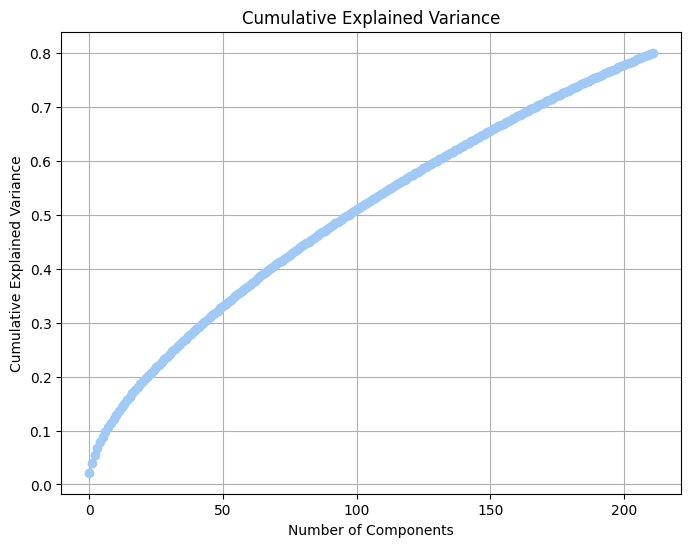

In [118]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Giả sử X_train đã được chuẩn bị
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)  # Sử dụng cùng scaler đã fit trên X_train


# Áp dụng PCA
pca = PCA(n_components=0.8)  # Giảm xuống 2 chiều để dễ vẽ
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)  # Dùng PCA đã fit trên X_train để giảm chiều X_val

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [119]:
import pandas as pd
import numpy as np

correlations = X_train.corrwith(y_train)
correlations = correlations.abs().sort_values(ascending=False)
num_features = int(0.8 * len(correlations)) 
selected_features = correlations.head(num_features).index  
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

print(f"Selected features: {selected_features}")


Selected features: Index(['Country_United States of America', 'YearsCodePro', 'Ratio', 'Age_40.0',
       'Age_30.0', 'Age_21.5', 'Terraform', 'Country_India',
       'Engineering manager', 'Homebrew',
       ...
       'WordPress', 'Country_Jordan', 'Country_Nepal', 'Elasticsearch',
       'Prolog', 'Country_Saudi Arabia', 'Crystal', 'FastAPI', 'IBM DB2',
       'PythonAnywhere'],
      dtype='object', length=303)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Mô hình

In [120]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Linear Regresion

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)



In [122]:
# Tính toán dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = lin_reg.predict(X_train)  # Dự đoán trên tập huấn luyện
y_val_pred = lin_reg.predict(X_val)     # Dự đoán trên tập kiểm tra

# Tính lỗi trên tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Tính lỗi trên tập kiểm tra (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print("Training set performance (E_train):")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2: {r2_train}")

print("\nValidation set performance (E_new):")
print(f"MAE: {mae_val}")
print(f"RMSE: {rmse_val}")
print(f"R^2: {r2_val}")


Training set performance (E_train):
MAE: 19645.324950690334
RMSE: 26631.692771216283
R^2: 0.7005536361329254

Validation set performance (E_new):
MAE: 20253424209296.875
RMSE: 197085445613109.78
R^2: -1.8289409913625037e+19


Đang bị overfitting

In [123]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

y_pred = lin_reg.predict(X_val_selected)
# Tính toán dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = lin_reg.predict(X_train_selected)  # Dự đoán trên tập huấn luyện
y_val_pred = lin_reg.predict(X_val_selected)     # Dự đoán trên tập kiểm tra

# Tính lỗi trên tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Tính lỗi trên tập kiểm tra (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print("Training set performance (E_train):")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2: {r2_train}")

print("\nValidation set performance (E_new):")
print(f"MAE: {mae_val}")
print(f"RMSE: {rmse_val}")
print(f"R^2: {r2_val}")



Training set performance (E_train):
MAE: 20031.157297830374
RMSE: 27180.971740137727
R^2: 0.688074084935412

Validation set performance (E_new):
MAE: 22586.588932806324
RMSE: 29565.38439297463
R^2: 0.5884167936861214


Dùng correlation tránh được overfitting khá tốt

Linear Regression + Bagging

In [ ]:
# from sklearn.ensemble import BaggingRegressor
# lr = LinearRegression()
# bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

# bagging_regressor.fit(X_train, y_train)
# y_pred = bagging_regressor.predict(X_val)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")

LGBMRegressor

In [160]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_val_pred = lgb_model.predict(X_val_temp)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 199
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [161]:
y_train_pred = lgb_model.predict(X_train_temp)

# Tính các lỗi trên bộ huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Tính các lỗi trên bộ validation (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print(f"Training MAE: {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")

Training MAE: 15982.252295674301
Training RMSE: 22109.053849792104
Training R²: 0.7936227530566855
Validation MAE: 22199.119952414454
Validation RMSE: 30009.631691134993
Validation R²: 0.5759550288967159


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [163]:
X_train_temp = X_train_selected
X_val_temp = X_val_selected
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_val_pred = lgb_model.predict(X_val_temp)

y_train_pred = lgb_model.predict(X_train_temp)

# Tính các lỗi trên bộ huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Tính các lỗi trên bộ validation (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print(f"Training MAE: {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 167
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


*pca tệ*

In [171]:
import lightgbm as lgb
X_train_temp = pd.DataFrame(X_train_pca)
X_val_temp = pd.DataFrame(X_val_pca)
X_train_temp.columns = [f'PC{i+1}' for i in range(X_train_temp.shape[1])]
X_val_temp.columns = [f'PC{i+1}' for i in range(X_val_temp.shape[1])]

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54060
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 212
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Có vẻ việc trích xuất đặc trưng theo phương sai (pca) kém hơn so với ma trận tương quan (correlation)

In [172]:
lgb_model.fit(X_train_temp, y_train)
# Tính toán hiệu suất trên tập huấn luyện (E_train)
y_train_pred_lgb = lgb_model.predict(X_train_temp)

mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

# In ra các chỉ số trên tập huấn luyện (E_train)
print(f"MAE (Train): {mae_train_lgb}")
print(f"RMSE (Train): {rmse_train_lgb}")
print(f"R² (Train): {r2_train_lgb}")
# Dự đoán trên tập validation
y_pred_lgb = lgb_model.predict(X_val_temp)

# Tính toán các chỉ số hiệu suất cho tập validation (E_new)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

# In ra các chỉ số trên tập validation (E_new)
print(f"MAE (Validation): {mae_lgb}")
print(f"RMSE (Validation): {rmse_lgb}")
print(f"R² (Validation): {r2_lgb}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54060
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 212
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


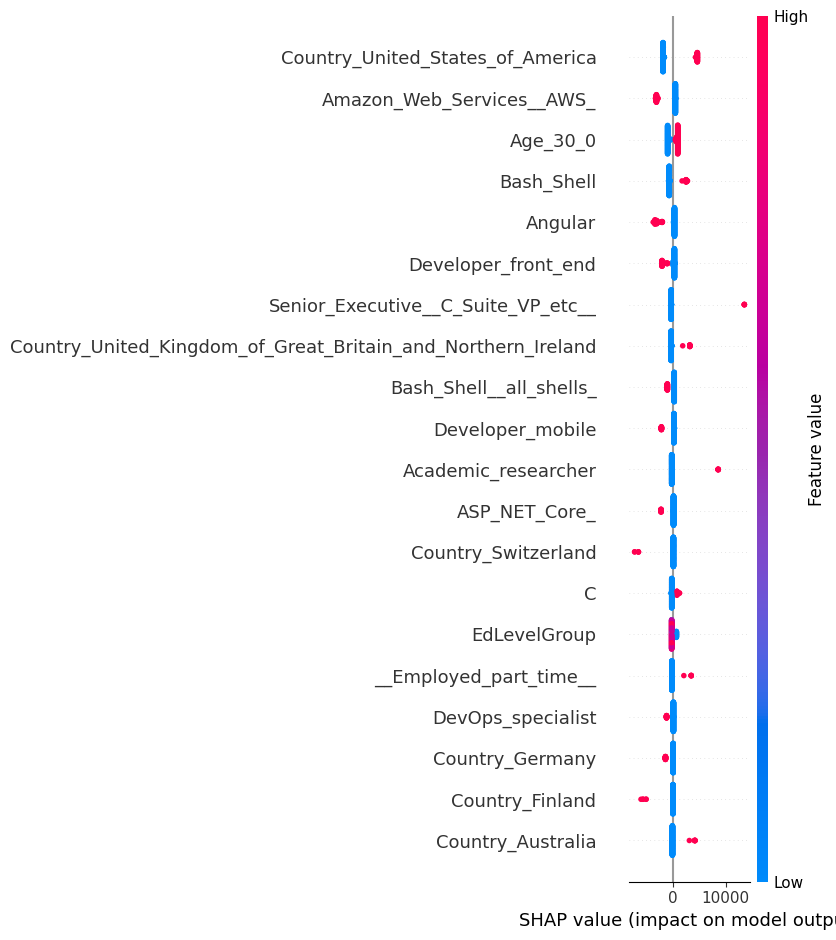

In [173]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [174]:
len(df1.columns)

381

In [191]:
# Tính toán giá trị SHAP trung bình

mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 0.2
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train.iloc[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


Important Features Index: 120


In [192]:
X_val_filtered = X_val.iloc[:,important_features]

In [205]:
import lightgbm as lgb
X_train_temp = X_train_filtered
X_val_temp = X_val_filtered
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators= 800,learning_rate=0.1,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 70
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(max_depth=3, n_estimators=800, random_state=42)

In [206]:
lgb_model.fit(X_train_temp, y_train)

# Dự đoán trên tập validation
y_pred_lgb = lgb_model.predict(X_val_temp)

# Tính toán các chỉ số hiệu suất cho tập validation (E_new)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)


# Tính toán hiệu suất trên tập huấn luyện (E_train)
y_train_pred_lgb = lgb_model.predict(X_train_temp)

mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

# In ra các chỉ số trên tập huấn luyện (E_train)
print(f"MAE (Train): {mae_train_lgb}")
print(f"RMSE (Train): {rmse_train_lgb}")
print(f"R² (Train): {r2_train_lgb}")
print(f"MAE (Validation): {mae_lgb}")
print(f"RMSE (Validation): {rmse_lgb}")
print(f"R² (Validation): {r2_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 70
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<!-- import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    model = lgb.LGBMRegressor(**params, random_state=42)
    score = -cross_val_score(model, X_train_temp, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(score) 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value) -->


In [ ]:
# import lightgbm as lgb
# best_params = study.best_params
# best_model = lgb.LGBMRegressor(**best_params, random_state=42)
# best_model.fit(X_train_temp, y_train)

# y_pred = best_model.predict(X_val_temp)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")


**SVM**

SVM với Linear kernel

In [207]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_val)

# Đánh giá mô hình
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of SVM with Linear Kernel: {mae}')
print(f'RMSE of SVM with Linear Kernel: {rmse}')
print(f'R^2 of SVM with Linear Kernel: {r2}')


MAE of SVM with Linear Kernel: 36752.52449213126
RMSE of SVM with Linear Kernel: 48122.57254780418
R^2 of SVM with Linear Kernel: -0.09040606447048094


SVM với kernel rbf

In [208]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Dự đoán trên tập huấn luyện (E_train)
y_train_pred = svr.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 5687.934552784993
RMSE (Train): 16095.691854007677
R² (Train): 0.8906192749499708
MAE (Validation): 22669.611527686167
RMSE (Validation): 30920.45330744166
R² (Validation): 0.5498240487809563


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# import optuna
# def objective(trial):
 
#     C = trial.suggest_loguniform('C', 1e-2, 1e5)  # Tham số C
#     epsilon = trial.suggest_uniform('epsilon', 0.01, 0.1)  # Tham số epsilon
#     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])  # Chọn loại kernel
    
#     # Tạo và huấn luyện mô hình SVR với các tham số tối ưu
#     svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
#     svr.fit(X_train, y_train)
    
#     # Dự đoán trên tập validation
#     y_pred = svr.predict(X_val)
    
#     # Tính các chỉ số đánh giá mô hình
#     mae = mean_absolute_error(y_val, y_pred)
#     rmse = mean_squared_error(y_val, y_pred, squared=False)
#     r2 = r2_score(y_val, y_pred)
    
#     # Hàm mục tiêu là MAE (có thể thay đổi thành RMSE hoặc R² tùy theo mục tiêu)
#     return mae

# # Tạo study và tối ưu hóa hyperparameters
# study = optuna.create_study(direction='minimize')  # Tối thiểu hóa MAE
# study.optimize(objective, n_trials=100)

# # In kết quả tối ưu
# print(f"Best trial: {study.best_trial.number}")
# print(f"Best value (MAE): {study.best_trial.value}")
# print(f"Best parameters: {study.best_trial.params}")

# # Sử dụng các tham số tối ưu cho mô hình cuối cùng
# best_params = study.best_trial.params
# svr_best = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
# svr_best.fit(X_train, y_train)

# # Dự đoán và đánh giá với mô hình tốt nhất
# y_pred_best = svr_best.predict(X_val)
# mae_best = mean_absolute_error(y_val, y_pred_best)
# rmse_best = mean_squared_error(y_val, y_pred_best, squared=False)
# r2_best = r2_score(y_val, y_pred_best)

# # In kết quả với tham số tối ưu
# print(f"Optimized MAE: {mae_best}")
# print(f"Optimized RMSE: {rmse_best}")
# print(f"Optimized R²: {r2_best}")

SVM, kernerl rbf và LR

In [211]:
lr_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=120000, epsilon=0.05)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

y_train_pred = stacking_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")


MAE (Train): 5902.209379873871
RMSE (Train): 14457.8832040866
R² (Train): 0.9117467060628521
MAE (Validation): 22599.5872046679
RMSE (Validation): 30540.220758105675
R² (Validation): 0.5608277096444891


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVM, kernel rbf và theo bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.05)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=100,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [212]:
rf_model = RandomForestRegressor(n_estimators=900, max_depth=15,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)
y_train_pred = rf_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE (Train): 13302.628278991057
RMSE (Train): 17170.08348118916
R² (Train): 0.8755295346642876
MAE: 23437.457458907236
RMSE: 32440.1999533892
R²: 0.5044840581271675


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('gbm', gbm_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 10267.883407288817
RMSE (Train): 16536.170229410265
R² (Train): 0.8845506828303218
MAE: 22010.370804823506
RMSE: 30068.058546166834
R²: 0.574302244045124


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


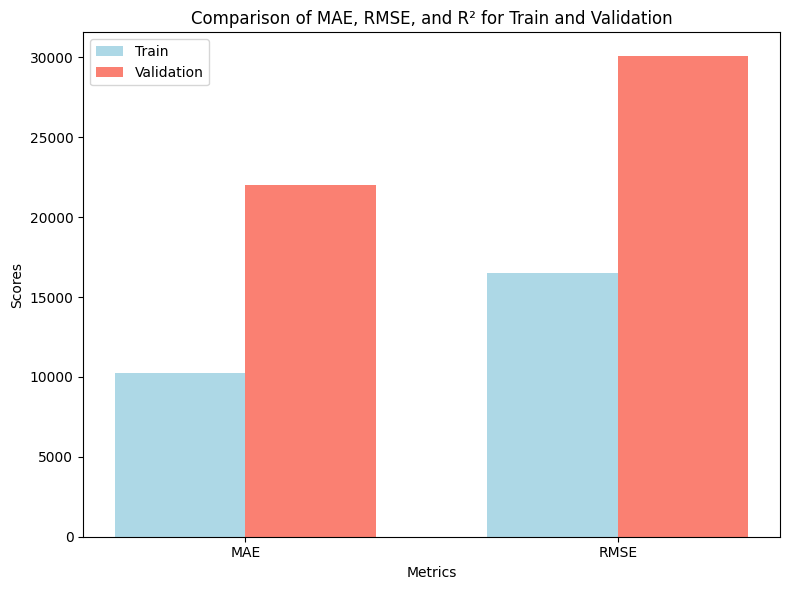

In [ ]:
metrics = ['MAE', 'RMSE']
train_scores = [mae_train, rmse_train]
val_scores = [mae, rmse]
x = np.arange(len(metrics))  # vị trí của các metrics

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35  # chiều rộng của mỗi bar
ax.bar(x - bar_width/2, train_scores, bar_width, label='Train', color='lightblue')
ax.bar(x + bar_width/2, val_scores, bar_width, label='Validation', color='salmon')

# Thêm các chi tiết cho biểu đồ
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE, RMSE, and R² for Train and Validation')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**XGBoost**

XGB

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=700, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 12210.219620178372
RMSE (Train): 18715.616633779984
R² (Train): 0.8521130742463757
MAE (Validation): 21613.607108622713
RMSE (Validation): 29694.70193496006
R² (Validation): 0.5848084299680536


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGB + Random forest

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.5,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=3,
    random_state=42
)

meta_model = Ridge(alpha=0.1)

stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=meta_model
)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 21976.98854095688
RMSE: 30525.340734766556
R²: 0.561255558676322


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Trung bình theo trọng số cho XGB + GB

In [ ]:

# weight_xgb = 0.8
# weight_gb = 0.2

# xgb.fit(X_train, y_train)
# gb_model.fit(X_train, y_train)

# y_pred_xgb = xgb_best.predict(X_val)
# y_pred_gb = gb_model.predict(X_val)

# y_pred_weighted = (weight_xgb * y_pred_xgb + weight_gb * y_pred_gb)

# mae_weighted = mean_absolute_error(y_val, y_pred_weighted)
# rmse_weighted = mean_squared_error(y_val, y_pred_weighted, squared=False)
# r2_weighted = r2_score(y_val, y_pred_weighted)

# print("Combined Model (Weighted Averaging):")
# print(f"MAE: {mae_weighted}")
# print(f"RMSE: {rmse_weighted}")
# print(f"R²: {r2_weighted}")


**LGB**

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=700, learning_rate=0.05,max_depth=3, random_state=42)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('lgb', lgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE: (Validation){mae}")
print(f"RMSE: (Validation){rmse}")
print(f"R²: (Validation){r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 2028, number of used features: 199
[LightGBM] [Info] Start training from score 79601.088264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 12363.217777553142
RMSE (Train): 19599.434103683976
R² (Train): 0.8378157921410194
MAE: (Validation)21939.681318498595
RMSE: (Validation)29670.494064185124
R²: (Validation)0.5854851033369849


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Bayesian Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
import numpy as np

model = BayesianRidge()
model.fit(X_train, y_train)
predicted_mean, predicted_std = model.predict(X_val, return_std=True)

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")
# In kết quả
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 score: {r2:.4f}")


MAE (Train): 20839.9774
RMSE (Train): 28246.5951
R² (Train): 0.6631
MAE: 21939.6813
MSE: 880338218.0128
R^2 score: 0.5855


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Explainable Boosting Regression**

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.datasets import make_regression
model = ExplainableBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae:.4f}")
print(f"MSE(Validation): {mse:.4f}")
print(f"R^2 (Validation): {r2:.4f}")


MAE (Train): 17572.9489
RMSE (Train): 23969.6356
R² (Train): 0.7574
MAE (Validation): 21892.7426
MSE(Validation): 859621196.1760
R^2 (Validation): 0.5952


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**ElasticNet**

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.005, l1_ratio=0.01, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"Mean Squared Error (Validation): {mse}")
print(f"RMSE (Validation): {rmse}")
print(f"R² Score (Validation): {r2}")



MAE (Train): 20837.256327275467
RMSE (Train): 28242.88695564068
R² (Train): 0.6632251315098168
Mean Squared Error (Validation): 868553743.1139755
RMSE (Validation): 29471.235859969896
R² Score (Validation): 0.5910339257043236


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**CatBoost**

CatBoost

In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1200, learning_rate=0.05, depth=3, silent=True)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('catboost', catboost_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 13590.103028385565
RMSE (Train): 19947.48160296312
R² (Train): 0.8320045009750212
MAE (Validation): 21686.155715685036
RMSE (Validation): 29613.838476320896
R² (Validation): 0.5870666181764603


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost + LR

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

MAE (Train): 20837.256327275467
RMSE (Train): 28242.88695564068
R² (Train): 0.6632251315098168
MAE (Validation): 22047.354075550473
RMSE (Validation): 30072.0659225997
R² (Validation): 0.5741887651630276


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Kết hợp nhiều hơn 2 mô hình**

XGB + LR + SVM (kernel linear)

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "linear", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_regressor.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

XGB + LR + SVM (kernel rbf)

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGB + Ridge LR + LGBM

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
}
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
dt = DecisionTreeRegressor(max_depth = 3, random_state = 42)
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
catboost = CatBoostRegressor(n_estimators=500, learning_rate=0.01, depth=5, random_state=42, verbose=False)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr),
        ('dt', dt),
        ('lgb', lgb),
        ('catboost', catboost),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=21)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Ridge Regression: {mae}')
print(f'RMSE of Ridge Regression: {rmse}')
print(f'R^2 of Ridge Regression: {r2}')


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
svr = SVR(kernel = "rbf", C =2500000, epsilon = 0.02)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=500,learning_rate=0.06,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


In [ ]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [ ]:
# Tính toán giá trị SHAP trung bình
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 7
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train.iloc[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


In [ ]:
X_val_filtered = X_val.iloc[:,important_features]

In [ ]:
import lightgbm as lgb
X_train_temp = X_train_filtered
X_val_temp = X_val_filtered
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=500,learning_rate=0.05,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('True Values (y_val)')
plt.ylabel('Predictions (y_pred)')
plt.title('True Values vs Predicted Values')
plt.show()


In [ ]:
residuals = y_val - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linewidth=2)
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Error Distribution (Histogram of residuals)
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

train_errors = []
val_errors = []

for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Plot Learning Curve
plt.plot(range(1, len(X_train)), train_errors, label='Train Error')
plt.plot(range(1, len(X_train)), val_errors, label='Validation Error')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('MSE')
plt.show()


Thêm các mô hình khác

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

-----------------------------------------------------------------------------------------------------------------------------------------

Mô hình dựa trên cây: Decision Tree, Random Forest, XGBoost, LightGBM

In [ ]:
df2 = data

Mã hóa

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

In [ ]:
df2['Employment'].explode().unique()

In [ ]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa cột DevType
devtype_encoded = mlb.fit_transform(data['DevType'])
# Chuyển đổi kết quả thành DataFrame
devtype_encoded_df = pd.DataFrame(devtype_encoded, columns=mlb.classes_)

# Kết hợp vào dữ liệu gốc
df2 = pd.concat([df2, devtype_encoded_df], axis=1)

df2


In [ ]:
df2[df2['EdLevel'] == 'Secondary school']

In [ ]:

from sklearn.preprocessing import OrdinalEncoder

# Áp dụng OrdinalEncoder với thứ tự mới
df2['EdLevel'] = OrdinalEncoder(categories=[[
    'Other',
    'Some college',
    'Secondary school',
    'Professional degree',
    'Master’s degree',
    'Associate degree',
    'Bachelor’s degree',
    'Doctoral degree'
]]).fit_transform(df2[['EdLevel']])


In [ ]:
df2

Giả sử độ quan trọng của các skills là khác nhau

In [ ]:
all_skills = set([item for sublist in df2['skills'] for item in sublist])

for skill in all_skills:
    df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)


In [ ]:
df2

In [ ]:
all_employment_types = set([item for sublist in df2['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)


In [ ]:
df2 = df2.drop(columns = ['Country','Age','DevType','Employment'])

In [ ]:
df2 = df2.drop('skills',axis=1)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop(columns=['EdLevel'])  
y = df2['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df2.iloc[train_idx]
    temp_data = df2.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


In [ ]:
train_data

In [ ]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [ ]:
X_train

In [ ]:
numeric_columns = df2.select_dtypes(include=['string'])

In [ ]:
numeric_columns

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

In [ ]:
X_train = X_train.values  # Chuyển đổi DataFrame thành numpy array
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
# Tính toán giá trị SHAP trung bình
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 7
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


In [ ]:
X_val_filtered = X_val[:, important_features]

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1200, learning_rate=0.03, max_depth=3)

xgb_model.fit(X_train_filtered, y_train)
y_pred = xgb_model.predict(X_val_filtered)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    subsample=0.5,
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")